In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
#reading the dataset from advertising indestry 
df=pd.read_csv("advertising.csv")

In [29]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
df.isnull().sum()/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [31]:
df.shape


(200, 4)

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [33]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


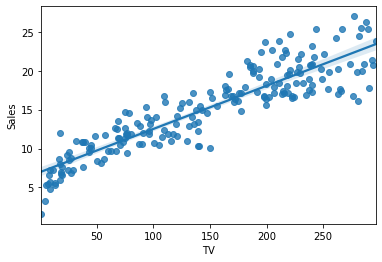

In [34]:
#Visulation of the data set
sns.regplot(x="TV",y="Sales",data=df)

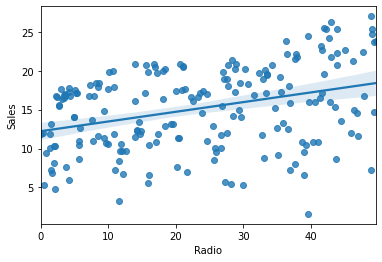

In [35]:

sns.regplot(x="Radio",y="Sales",data=df)

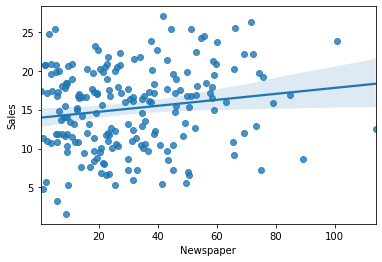

In [36]:

sns.regplot(x="Newspaper",y="Sales",data=df)

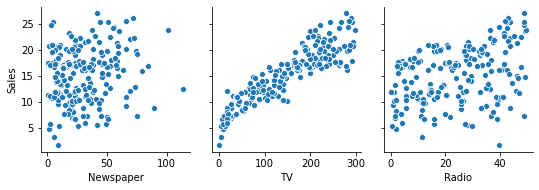

In [37]:
sns.pairplot(data=df,x_vars=["Newspaper","TV","Radio"],y_vars="Sales")

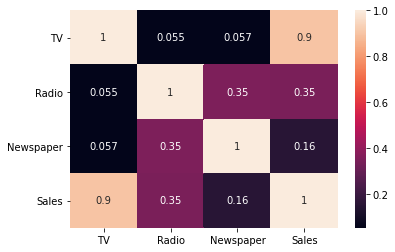

In [38]:
sns.heatmap(data=df.corr(),annot=True)

In [39]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


##### equation for the linear regression model as we can see this as
y=M*Tv +c
where M is called the modelling coefficients or model parameters.



In [40]:
#creating the X and y
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [41]:
X=df["TV"]
y=df["Sales"]

In [42]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [44]:
#train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [45]:
X_train.shape

(140,)

In [46]:
X_test.shape

(60,)

In [47]:
y_train.shape

(140,)

In [49]:
y_test.shape

(60,)

In [50]:
#model training
X_train_sm=sm.add_constant(X_train)

In [51]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [53]:
#y=c +m1.X1
#y=c.const +m1.TV

In [54]:
#fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [56]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [57]:
#sales =6.94+0.05TV


In [59]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           1.52e-52
Time:                        03:14:01   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
y_train_pred=lr_model.predict(X_train_sm)

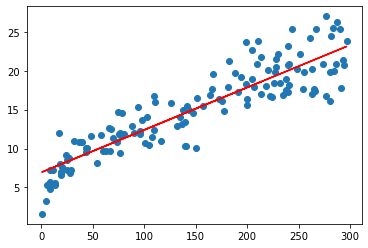

In [64]:
#model validation
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,"r")

#### step3
Residual analysis

In [65]:
#y_train,y_train_pred
#error is the difference between this two term above
res=y_train-y_train_pred

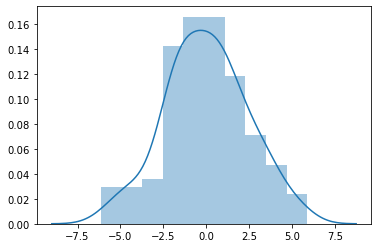

In [66]:
#plot the residuals
plt.figure()
sns.distplot(res)

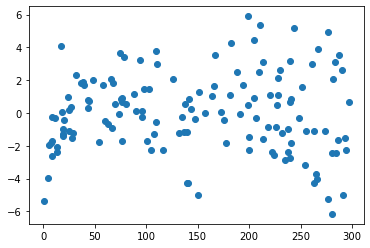

In [68]:
#look for the patterns in residual
plt.scatter(X_train,res)

##### Making the prediction based on the result

In [69]:
#Prediction and Evaluation of test set
#Predictions on the test set(y_test_pred)
#evalute the model,r-sqaured,on the test


In [71]:
#adding the costant to the value
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test_sm)

In [74]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)

In [75]:
r2

0.792103160124566

In [78]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826953

#### Using the sk learnmodel to achieve the goalf the modelling 
Linear regression Using the sklearn


In [79]:
#train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [80]:
from sklearn.linear_model import LinearRegression

In [82]:
#reshape to X_train to(140,1)
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [84]:
lm=LinearRegression()
lm.fit(X_train_lm,y_train)

LinearRegression()

In [86]:
lm.coef_

array([0.05454575])

In [89]:
#make prediction
y_train_pre=lm.predict(X_train_lm)

In [90]:
y_test_pre=lm.predict(X_test_lm)

In [91]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.792103160124566